<a href="https://colab.research.google.com/github/MayankHQ/machine_learning/blob/main/KNN_DecisionTree_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. Load Data
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# 2. Split (Standard 80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create Model with K=3 (Look at 3 closest neighbors)
knn = KNeighborsClassifier(n_neighbors=3)

# 4. Train (Memorize)
knn.fit(X_train, y_train)

# 5. Predict & Score
predictions = knn.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print(f"Accuracy with K=3: {accuracy * 100:.2f}%")

# Let's test a fake flower
# [Sepal Length, Sepal Width, Petal Length, Petal Width]
new_flower = [[5.1, 3.5, 1.4, 0.2]]
prediction_index = knn.predict(new_flower)[0]

print(f"The new flower is: {class_names[prediction_index]}")

Accuracy with K=3: 100.00%
The new flower is: setosa


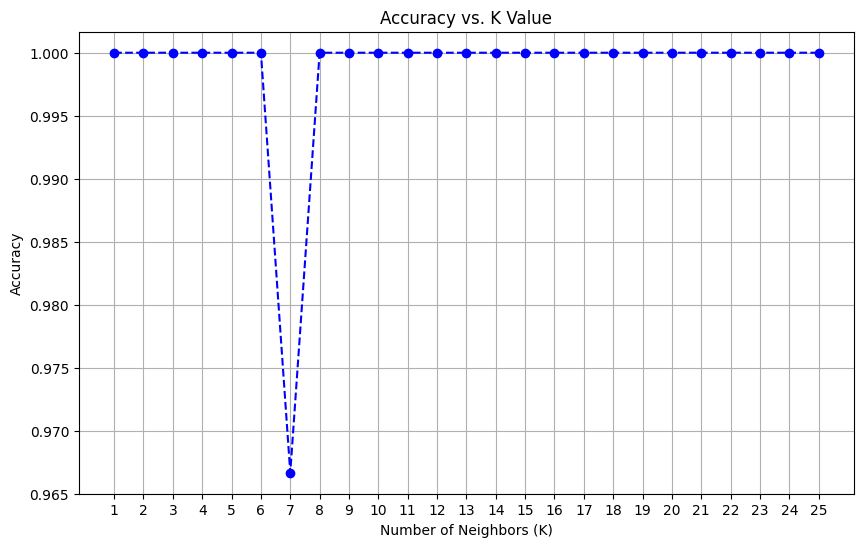

In [ ]:
k_range = range(1, 26) # Check K from 1 to 25
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_range, scores, marker='o', linestyle='dashed', color='blue')
plt.title("Accuracy vs. K Value")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.xticks(k_range)
plt.grid()
plt.show()

# **Decision Tree**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# 1. Load Data
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# 2. Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create the Tree
# "criterion='gini'" is the default math it uses to decide splits.
model = DecisionTreeClassifier(criterion='gini', random_state=42)

# 4. Train
model.fit(X_train, y_train)

# 5. Score
preds = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, preds) * 100:.2f}%")

Accuracy: 100.00%


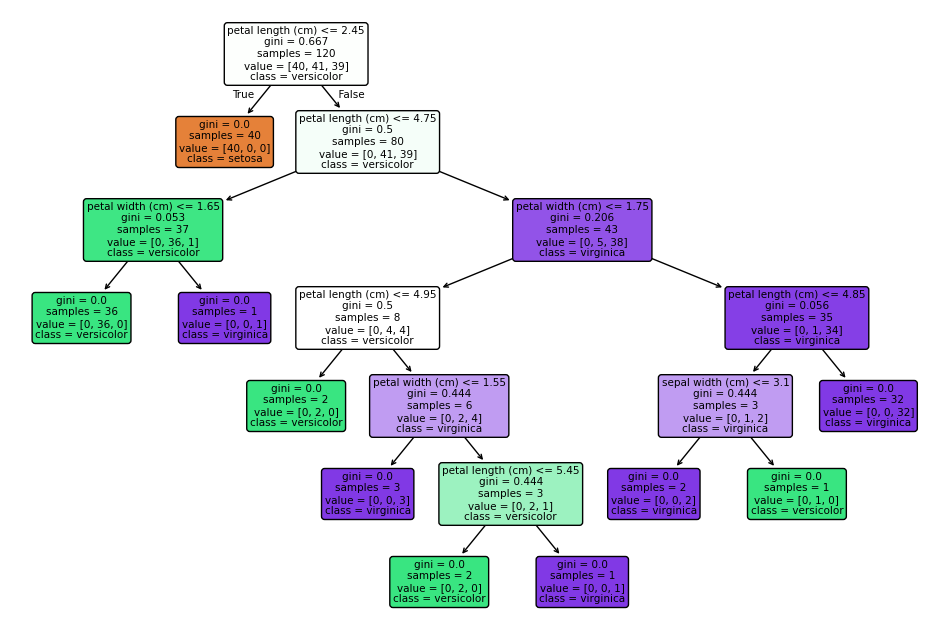

In [ ]:
plt.figure(figsize=(12, 8)) # Make the image big

plot_tree(model,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,      # Colors the boxes
          rounded=True)     # Rounds the corners

plt.show()

the decision tree is good but it leads to overfitting.If you show it a new flower that is slightly different, these super-specific rules will likely fail. This is why we usually "prune" the tree (set max_depth=3) so it learns general rules, not specific gossip about 2 flowers.

Pruned Accuracy: 100.00%


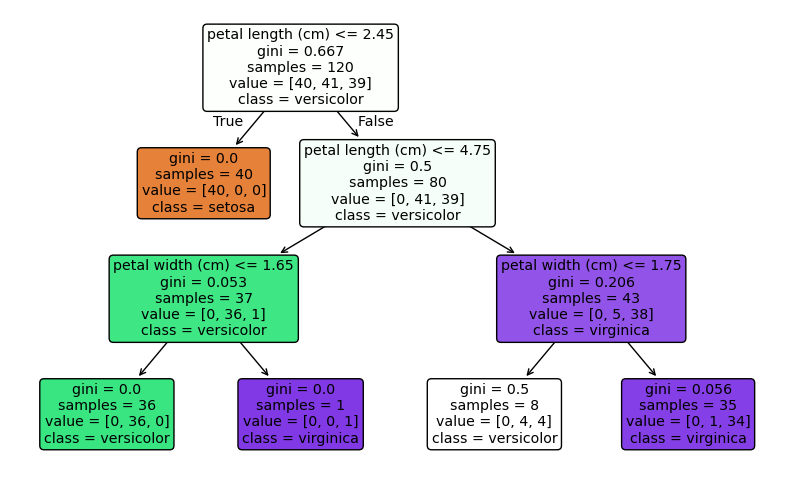

In [ ]:
# 1. Create the "Smart" Pruned Tree
pruned_model = DecisionTreeClassifier(max_depth=3, criterion='gini', random_state=42)
pruned_model.fit(X_train, y_train)

# 2. Check Accuracy (Did we lose much?)
# Often, accuracy stays the same or even IMPROVES because we removed noise.
print(f"Pruned Accuracy: {pruned_model.score(X_test, y_test) * 100:.2f}%")

# 3. Visualize the Clean Tree
plt.figure(figsize=(10, 6))
plot_tree(pruned_model,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Load Data
digits = load_digits()
X = digits.data   # The pixels (64 columns)
y = digits.target # The actual number (0-9)

# 2. Split Data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create the Forest
# n_estimators=100  -> We are building 100 trees.
# max_depth=10      -> Each tree can ask up to 10 questions.
# random_state=42   -> Ensures we get the same result every time we run this code.
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# 4. Train the model (This trains 100 trees in parallel!)
rf_model.fit(X_train, y_train)

# 5. Predict & Evaluate
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")

Random Forest Accuracy: 97.22%



Top 10 Important Features (Pixel Indices):
1. Feature 36 (Importance: 0.0483)
2. Feature 21 (Importance: 0.0482)
3. Feature 26 (Importance: 0.0438)
4. Feature 43 (Importance: 0.0416)
5. Feature 42 (Importance: 0.0398)
6. Feature 28 (Importance: 0.0317)
7. Feature 61 (Importance: 0.0305)
8. Feature 30 (Importance: 0.0304)
9. Feature 33 (Importance: 0.0286)
10. Feature 27 (Importance: 0.0280)


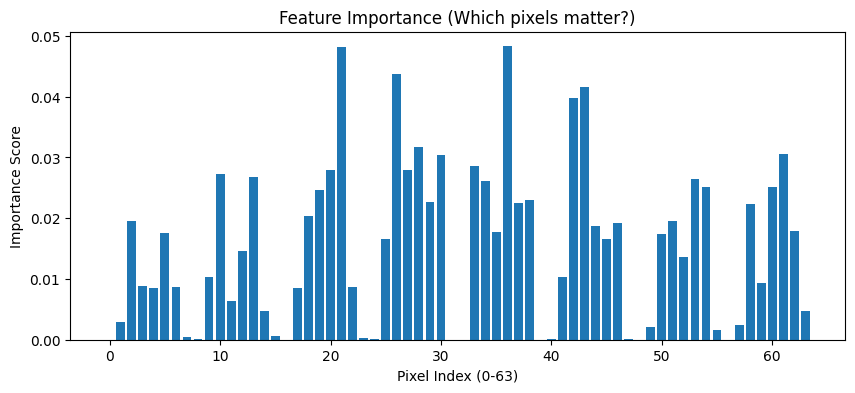

In [ ]:
# Get importance scores
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1] # Sort most important to least

# Let's print top 10 most important features (pixels)
print("\nTop 10 Important Features (Pixel Indices):")
for i in range(10):
    print(f"{i+1}. Feature {indices[i]} (Importance: {importances[indices[i]]:.4f})")

# Plot them
plt.figure(figsize=(10, 4))
plt.title("Feature Importance (Which pixels matter?)")
plt.bar(range(X.shape[1]), importances)
plt.xlabel("Pixel Index (0-63)")
plt.ylabel("Importance Score")
plt.show()